# Analysis 1

## -- Pre-Processing --

Imports: 

In [1]:
import pandas as pd

1. Generate pp1.csv \
\
    Removed Columns: ['gameNum', 'player', 'me', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', \
            'settlement1', 'settlement2']

2. Generate pp2.csv \
\
Removed Columns: ['totalGain', 'totalLoss', 'totalAvailable']

In [2]:
def pp1():
    # Load Dataframe
    df = pd.read_csv('catanstats.csv')

    # Remove Unwanted Features
    drop = ['gameNum', 'player', 'me', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
            'settlement1', 'settlement2']
    df.drop(drop, axis=1, inplace=True)
    for i in range(1,11):
        df.drop(df.columns[1], axis=1, inplace=True)

    df.to_csv('pp1.csv', index=False)

def pp2():
    # Load Dataframe
    df = pd.read_csv('pp1.csv')

    # Remove Unwanted Features
    drop = ['totalGain', 'totalLoss', 'totalAvailable']
    df.drop(drop, axis=1, inplace=True)
    df.to_csv('pp2.csv', index=False)

3. Generate new datasets

In [3]:
pp1()
pp2()

PP1: Contains data for visual analysis \
PP2: Contains data for finding specific important features using Elastic Net Regression

## -- Data Visualization --

Imports: 

In [4]:
import matplotlib.pylab as plt
import seaborn as sns

1. Load data into a dataframe

In [5]:
df = pd.read_csv('pp1.csv')
print(df.head(10))

   points  production  tradeGain  robberCardsGain  totalGain  tradeLoss  \
0       5          38          5                2         45         10   
1       9          48          8                6         62         11   
2      10          44         14                9         67         24   
3       5          42         12                0         54         24   
4      10          60         15               16         91         28   
5       6          57         12                1         70         26   
6       4          44         10                8         62         18   
7       9          61         16               11         88         25   
8       5          44          5                5         54         11   
9      10          41          4                9         54          8   

   robberCardsLoss  tribute  totalLoss  totalAvailable  
0                2        4         16              29  
1                1        8         20              42  
2  

2. Generate pairplot for the major feautres to see how it affect points

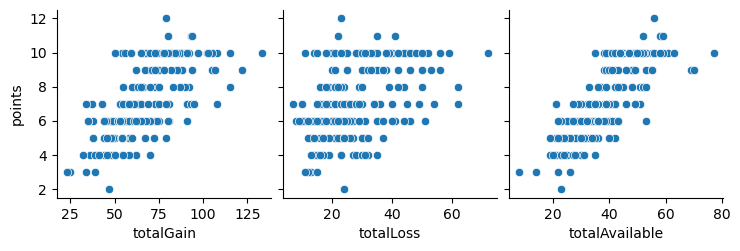

In [6]:
sns.pairplot(df, x_vars=['totalGain', 'totalLoss', 'totalAvailable'], y_vars=['points'])
plt.show()

## -- Regression Analysis --

Imports: 

In [25]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

1. Load data into dataframe and set X, Y for regressor

In [26]:
df = pd.read_csv('pp2.csv')

Y = df['points']
X = df.drop('points', axis=1)

2. Standardized the data to compare features

In [27]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X)

     production  tradeGain  robberCardsGain  tradeLoss  robberCardsLoss  \
0     -0.901269  -0.817795        -0.972315  -0.840006        -0.835797   
1     -0.251940  -0.132492        -0.104177  -0.732036        -1.088304   
2     -0.511671   1.238114         0.546927   0.671573        -0.330784   
3     -0.641537   0.781246        -1.406385   0.671573         0.174230   
4      0.527255   1.466549         2.066170   1.103453         1.184257   
..          ...        ...              ...        ...              ...   
195   -0.706470  -0.132492         0.980997   0.455633        -0.330784   
196   -0.706470  -0.589361         0.112858  -0.408126         0.174230   
197    0.786987  -0.817795         0.546927  -0.300156         0.174230   
198   -0.511671  -0.360926        -0.538246   0.455633        -1.088304   
199    0.332457  -1.274664        -0.321211  -1.703766         1.689270   

      tribute  
0   -0.199490  
1    0.549768  
2   -0.948749  
3   -0.948749  
4   -0.948749  
.. 

3. Find a model that has the smallest mean squared error by iterating through 10^4 times

In [15]:
minimalError = 10000
bestModel = ElasticNet()
for i in range(0, 10**4):

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

    model = ElasticNet()
    model.fit(X_train, Y_train)

    Y_pred = model.predict(X_test)

    if(mean_squared_error(Y_test, Y_pred) < minimalError):
        minimalError = mean_squared_error(Y_test, Y_pred)
        bestModel = model

4. Get the coefficient values for each individual features

In [16]:
values = []
print('meanSquaredError: ' + str(minimalError))
print('Intercept: ' + str(bestModel.intercept_))
for i in range(0, 6):
    print('Feature ' + str(i) + ': ' + str(bestModel.coef_[i]))
    values.append(bestModel.coef_[i])

print(values)

meanSquaredError: 1.0492653585410927
Intercept: 7.290507769431564
Feature 0: 0.6191676600767094
Feature 1: 0.0
Feature 2: 0.0794819239320997
Feature 3: 0.0
Feature 4: 0.0
Feature 5: -0.0
[0.6191676600767094, 0.0, 0.0794819239320997, 0.0, 0.0, -0.0]


5. Create a bar chart to visually compare feature importance

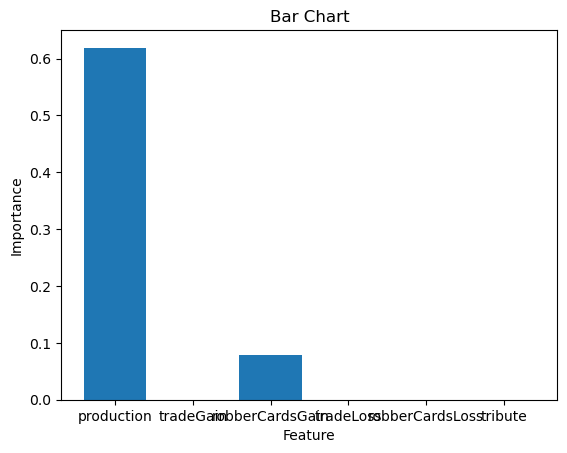

In [24]:
d = {'Features': ['production', 'tradeGain', 'robberCardsGain', 'tradeLoss', 'robberCardsLoss', 'tribute'],
     'Coef': [values[0], values[1], values[2], values[3], values[4], values[5],]}

dfResult = pd.DataFrame(d)
plt.bar(dfResult['Features'], dfResult['Coef'])
# add labels to the chart
plt.title('Bar Chart')
plt.xlabel('Feature')
plt.ylabel('Importance')

# display the chart
plt.show()